In [1]:
%matplotlib inline

import torch
from torch import nn

import matplotlib.pyplot as plt 
from torch import tensor
from IPython.display import HTML
from celluloid import Camera

In [2]:
n=100 
x = torch.ones(n,2)
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [3]:
x[:,0].uniform_(-1.,1)
x[:5] 

tensor([[-0.8160,  1.0000],
        [ 0.9021,  1.0000],
        [-0.2179,  1.0000],
        [ 0.3222,  1.0000],
        [ 0.9783,  1.0000]])

In [4]:
a = tensor([3.,2]);
a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n) 

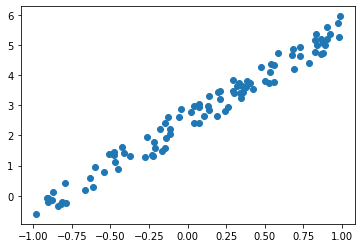

In [6]:

plt.scatter(x[:,0], y)

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [8]:
a = tensor([-1., 1])

In [9]:
y_hat = x @ a
mse(y_hat, y)

tensor(8.7006)

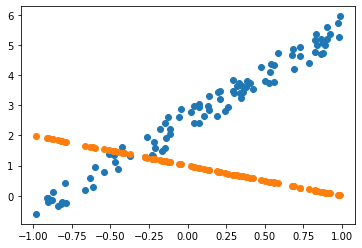

In [10]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

In [11]:
a = nn.Parameter(a); 
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [12]:
def update():
    y_hat = x@a
    loss = mse(y_hat, y)
    if t % 10 == 0:
        print(loss)
    loss.backward();
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
        

lr =1e-1
for t in range(100): update()
    


tensor(8.7006, grad_fn=<MeanBackward0>)


C:\Users\USER\miniconda3\lib\site-packages\torch\autograd\__init__.py:147: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  Variable._execution_engine.run_backward(


tensor(1.3587, grad_fn=<MeanBackward0>)
tensor(0.4291, grad_fn=<MeanBackward0>)
tensor(0.1783, grad_fn=<MeanBackward0>)
tensor(0.1075, grad_fn=<MeanBackward0>)
tensor(0.0874, grad_fn=<MeanBackward0>)
tensor(0.0818, grad_fn=<MeanBackward0>)
tensor(0.0802, grad_fn=<MeanBackward0>)
tensor(0.0797, grad_fn=<MeanBackward0>)
tensor(0.0796, grad_fn=<MeanBackward0>)


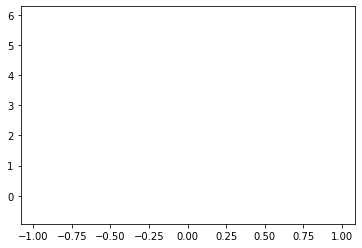

In [13]:
fig = plt.figure()
camera = Camera(fig)
lr =1e-1

for t in range(100):
    update()
    
    plt.scatter(x[:,0], y,  color='blue')
    t = plt.scatter(x[:,0], x@a.detach().numpy(), color='orange')
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())